In [1]:
import numpy as np
import matplotlib.pyplot as plt

import parameters as prms
import simulate_stimuli as stimuli
import simulate_trajectories as traj
import likelihood_fokker_plank as ll_fkp
import likelihood_gradient as ll_grad
import optimization_parameters as fitting
import graphics

# Reloading modules automatically :
%load_ext autoreload
%autoreload 2

parameters imported
simulated_stimuli imported
simulate_trajectories imported
likelihood_fokker_plank imported
likelihood_gradient imported
optimization_parameters imported
graphics imported


## Parameters

In [3]:
dx = 0.25
dt = 0.02
dur = prms.dur
lbda, sgm2a, sgm2s, phi, tau_phi, b = 1, 0.5, 0.5, 1.2, 0.04, 30
theta = np.array([lbda, sgm2a, sgm2s, phi, tau_phi, b])
sgm2i, rho = 0, 0
dphi = (2.5-0.1)/10
dtphi = (1-0.005)/10
print('Duration',dur)

Duration 0.25


## Stimuli and Data

Number of pulses : 2 9


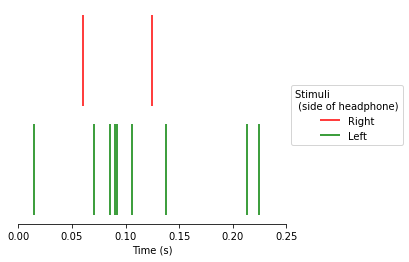

CR, CL
[0 0 0 1 0 0 1 0 0 0 0 0 0]
[1 0 0 1 3 1 1 0 0 0 1 1 0]
c, sgm2dt
[ -50.    0.    0.    0. -150.  -50.    0.    0.    0.    0.  -50.  -50.
    0.]
[0.0225 0.01   0.01   0.035  0.0475 0.0225 0.035  0.01   0.01   0.01
 0.0225 0.0225 0.01  ]
[{'d': 'L', 'times_r': array([0.06042529, 0.12448144]), 'times_l': array([0.01492553, 0.0705173 , 0.08544515, 0.09052977, 0.0920605 ,
       0.10642244, 0.13761424, 0.2135628 , 0.22432066]), 'dur': 0.25}]


In [4]:
times_r, times_l = stimuli.clicks(dur=dur)
print('Number of pulses :', len(times_r), len(times_l))
graphics.show_trial(times_r, times_l, prms.params_sim)
CR, CL = ll_fkp.input_pulses(times_r, times_l, dur)
print('CR, CL')
print(CR)
print(CL)

c = ll_fkp.total_input(CR, CL)
sgm2dt = ll_fkp.total_variance(CR, CL)
print('c, sgm2dt')
print(c)
print(sgm2dt)
# c = np.array([1,0])
# sgm2dt = np.array([10, 0.01])

D = [{'d':'L', 'times_r':times_r, 'times_l':times_l, 'dur':dur}]
print(D)

## F matrix

30 0.25
nbx, nbs, T =  (241, 141, 13)
Computing lines
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
Maximum F : 1.0 Minimum F : 0.0
Sum F across lines
Max : 1.0000000000000004 Min : 0.99999999

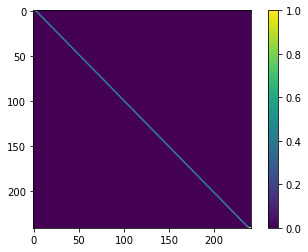

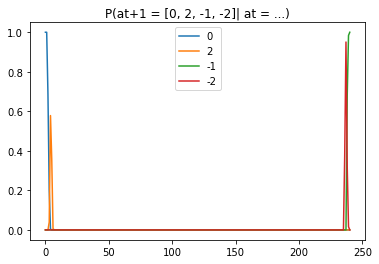

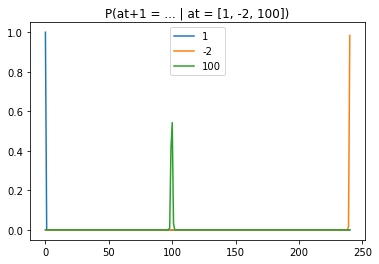

In [3]:
X = ll_fkp.discretize_space(b, dx)
s0 = ll_fkp.discretize_gaussian(sgm2dt)
m = ll_fkp.deterministic_drift(X, c, lbda, dt)
ps = ll_fkp.gaussian(s0, sgm2dt)
S = ll_fkp.ornstein_uhlenbeck_process(m, s0)
F = ll_fkp.F_matrix(times_r, times_l, dur, lbda, b, sgm2a, sgm2s, phi, tau_phi, dt, dx, check=True, renorm=True)

## B matrix

likelihood_fokker_plank imported
likelihood_gradient imported
optimization_parameters imported
Forward pass
30.523496633799088 0.25
nbx, nbs, T =  (247, 141, 13)
Computing lines
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232


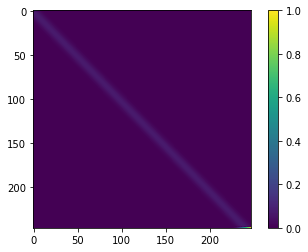

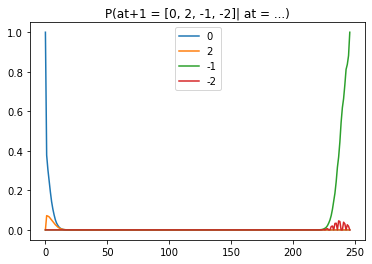

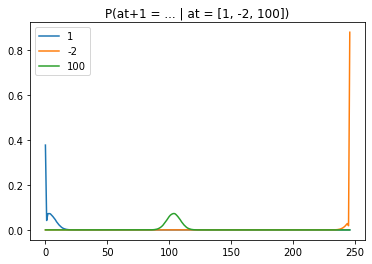

Backward pass
Maximum value in B : 1.0
Sum across lines :
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Number of problematic divisions by 0 : 0
Negligible -> replaced by 0.


In [17]:
k = 0
X = ll_fkp.discretize_space(b, dx)
print('Forward pass')
F = ll_fkp.F_matrix(D[k]['times_r'], D[k]['times_l'], D[k]['dur'], lbda, b, sgm2a, sgm2s, phi, tau_phi, dt, dx)
pa0 = ll_fkp.initialize_prior_distribution(X, sgm2i)
Pa = ll_fkp.prior_probability_distribution(pa0, F)

print('Backward pass')
B = ll_grad.B_matrix(F, Pa, check=True, renorm=True)
pb0 = ll_grad.initialize_posterior_distribution(D[k]['d'], Pa[:,-1], X, rho, renorm=True)
Pb = ll_grad.posterior_probability_distribution(pb0, B)

## Gradient

In [ ]:
dF_dlbda, dF_dsgm2a, dF_dsgm2s, dF_dphi, dF_dtphi, dF_db = ll_grad.F_gradient(D[k]['times_r'], D[k]['times_l'], D[k]['dur'], X, lbda, sgm2a, sgm2s, phi, tau_phi, b, dphi, dtphi, dt, dx)

print(dF_dlbda.shape)
print(dF_dsgm2a.shape)
print(dF_dphi.shape)
print(dF_db.shape)

Computing lines
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [13]:
dLL_dlbda = ll_grad.LL_gradient_theta(Pa, Pb, dF_dlbda)
dLL_dsgm2a = ll_grad.LL_gradient_theta(Pa, Pb, dF_dsgm2a)
dLL_dsgm2s = ll_grad.LL_gradient_theta(Pa, Pb, dF_dsgm2s)
dLL_dphi = ll_grad.LL_gradient_theta(Pa, Pb, dF_dphi)
dLL_dtphi = ll_grad.LL_gradient_theta(Pa, Pb, dF_dtphi)
dLL_db = ll_grad.LL_gradient_theta(Pa, Pb, dF_db)
print(dF_dlbda.shape)
print(Pa.shape)
print(Pb.shape)
print(dLL_db)

find_best_params imported
(241, 241, 13)
(241, 13)
(241, 13)
-495.18253996078346


find_best_params imported
lbda, sgm2a, sgm2s, phi, tau_phi, b =  1.0 0.5 0.5 1.2 0.04 30.0
Forward pass
nbx, nbs, T =  (241, 141, 13)
Computing lines
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239


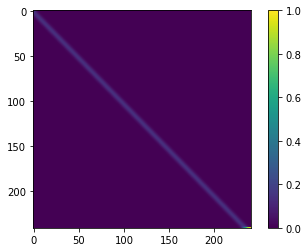

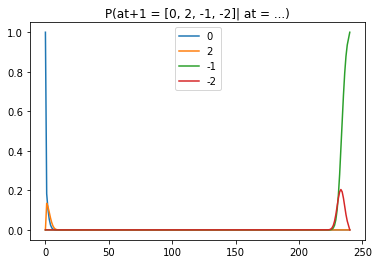

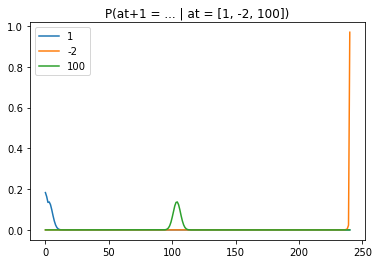

Backward pass
Maximum value in B : 1.0
Sum across lines :
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Number of problematic divisions by 0 : 0
Negligible -> replaced by 0.
Gradient
Computing lines
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [22]:
dLL = ll_grad.LL_gradient(D, lbda, sgm2a, sgm2s, phi, tau_phi, b, sgm2i, rho, dphi, dtphi, dx, dt)
print("dLL_dlbda, dLL_dsgm2a, dLL_dsgm2s, dLL_dphi, dLL_dtphi, dLL_db", dLL)

## Parameter fitting

In [15]:
# Generating trials 
trials = stimuli.generate_experiment(params=prms.params_sim, ntrials=2)
times_r, times_l = stimuli.clicks(dur=dur)

# Generating data 
print('True parameters', prms.convert_dict_to_vect(prms.theta_test))
D = traj.generate_data(trials, params=prms.params_sim, theta=prms.theta_test)
print(D)

# Fitting
lbda, sgm2a, sgm2s, phi, tau_phi, b = 1, 0.5, 0.5, 1.2, 0.04, 30
theta0 = np.array([lbda, sgm2a, sgm2s, phi, tau_phi, b])
print('Origin', theta0)

fitting.fit_parameters(D, theta0)

simulate_trajectories imported
True parameters [1.00e+00 7.00e+01 1.75e+00 1.20e+00 4.00e-02 3.00e+01]
[{'gamma': 1.2, 'dur': 0.25, 'times_r': array([0.0541089 , 0.14737575]), 'times_l': array([0.00642471, 0.03670516, 0.05299974, 0.0835307 , 0.10529561,
       0.12053396, 0.12566218, 0.13190521, 0.20329616, 0.2131256 ,
       0.22041494, 0.24267932]), 'd': 'L'}, {'gamma': 1.2, 'dur': 0.25, 'times_r': array([0.00227644, 0.00843202, 0.04979875, 0.08896075, 0.10928826,
       0.12139936, 0.1587878 , 0.16402407, 0.16856441, 0.20879928]), 'times_l': array([], dtype=float64), 'd': 'R'}]
Origin [ 1.    0.5   0.5   1.2   0.04 30.  ]


NameError: name 'params' is not defined

In [ ]:
lbda, sgm2a, sgm2s, phi, tau_phi, b =  0.9904209095396972, 0.7107378533499997, 0.6908640633231468, 1.214413372426684, 0.35399667093237897, 31.049848123542763
theta = np.array([lbda, sgm2a, sgm2s, phi, tau_phi, b])

SIMULATIONS
full avec different trajectoires
et différents types de paramètres
S3
renormaliser la figure
Constantin reverse correlation sigmoid et chronometric plots

LIKELIHOOD
schéma explicatif de la discrétisation et éventuellement formules
S14 retourner 
générer les mêmes
faire les plots avec la likelihood

GRADIENT 
shéma
Montrer les probabilites forward backward et matrice de transition

OPTIMISATION PARAMETERS
S6
S8 panel i
S9 c